# datetime 오브젝트 사용하기

In [1]:
from datetime import datetime

In [2]:
# 현재시간 출력
now1 = datetime.now()
print(now1)  # 2019-10-11 09:15:44.339003

now2 = datetime.today()
print(now2)  # 2019-10-11 09:15:44.340002

2019-10-11 09:15:44.339003
2019-10-11 09:15:44.340002


In [3]:
# 시간을 직접 입력하여 인자로 전달
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2019-10-11 09:17:09.809965
1970-01-01 00:00:00
1970-12-12 13:24:34


In [4]:
# datetime오브젝트는 시간 계산 가능!!
diff1 = t1 - t2
print(diff1)  # 18180 days, 9:17:09.809965
print(type(diff1))  # <class 'datetime.timedelta'>

18180 days, 9:17:09.809965
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환하기

In [5]:
import pandas as pd
import os

ebola = pd.read_csv('../data/country_timeseries.csv')

In [6]:
print(ebola.info())  # Date : 122 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB
None


In [7]:
# 시계열 데이터를 문자열로 저장해야할 때도 있지만, 문자열은 시간계산을 할 수 없으므로 datetime오브젝트로 변환해야함
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())  # date_dt :122 non-null datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [9]:
# 시간형식지정자(%d, %m, %y)와 기호(/, -)를 적절히 조합해 format인자에 전달하면 그 형식에 맞게 정리된 datetime오브젝트를 얻을 수 있음
test_df1 = pd.DataFrame({'order_day': ['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

#   order_day   date_dt1   date_dt2   date_dt3
# 0  01/01/15 2015-01-01 2015-01-01 2001-01-15
# 1  02/01/15 2015-01-02 2015-02-01 2002-01-15
# 2  03/01/15 2015-01-03 2015-03-01 2003-01-15

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


# 시간 데이터를 잘라내고 싶어요

In [10]:
# 내가 원하는 시계열 데이터의 시간요소가 연, 월, 일뿐이라면 now메서드로 얻은 시계열데이터를 잘라내야함. -> strftime 사용
now = datetime.now()
nowDate = now.strftime('%Y-%m-%d')
nowTime = now.strftime('%H:%M:%S')
nowDateTime = now.strftime('%Y-%m-%d %H:%M:%S')

print(nowDate)  # 2019-10-11
print(nowTime)  # 09:34:16
print(nowDateTime)  # 2019-10-11 09:34:16

2019-10-11
09:34:16
2019-10-11 09:34:16


# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [11]:
# 열 지정해서 데이터 집합 불러오기 -> read_csv의 parse_dates인자
ebola1 = pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())  # Date : 122 non-null datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB
None


# datetime 오브젝트에서 날짜 정보 추출하기

In [14]:
# 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

# 0   2018-05-16
# 1   2018-05-17
# 2   2018-05-18
# dtype: datetime64[ns]

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [15]:
print(d1[0].year)  # 2018
print(d1[0].month)  # 5
print(d1[0].day)  # 16

2018
5
16


# dt 접근자로 시간 데이터 정리하기

In [17]:
# dt접근자 이용X
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola[['Date', 'date_dt']].head())
        #          Date    date_dt
        # 0    1/5/2015 2015-01-05
        # 1    1/4/2015 2015-01-04
        # 2    1/3/2015 2015-01-03
        # 3    1/2/2015 2015-01-02
        # 4  12/31/2014 2014-12-31

print(ebola['date_dt'][3].year)  # 2015
print(ebola['date_dt'][3].month)  # 1
print(ebola['date_dt'][3].day)  # 2

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [18]:
# 문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 이용해야함.
# datetime 오브젝트도 마찬가지로 dt접근자를 사용하면 datetime속성이나 메서드를 사용해 시계열 데이터 처리 가능
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

#          Date    date_dt  year
# 0    1/5/2015 2015-01-05  2015
# 1    1/4/2015 2015-01-04  2015
# 2    1/3/2015 2015-01-03  2015
# 3    1/2/2015 2015-01-02  2015
# 4  12/31/2014 2014-12-31  2014

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [19]:
# 월, 일 데이터를 한번에 추출해서 새로운 열로 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [20]:
print(ebola.info())

# 연, 월, 일 => 정수
# year                   122 non-null int64
# month                  122 non-null int64
# day                    122 non-null int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                  122 no

# 에볼라 최초 발생일 계산해보기

In [21]:
# 시간순으로 살펴보려면 데이터프레임의 마지막부터 살펴봐야함
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [22]:
# min을 이용해 에볼라의 최초 발병일 찾기
print(ebola['date_dt'].min())  # 2014-03-22 00:00:00
print(type(ebola['date_dt'].min()))  # timestamps: Datetime 오브젝트와 호환되는 자료형

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [26]:
# Date열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있음
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

#          Date  Day outbreak_d
# 0    1/5/2015  289   289 days
# 1    1/4/2015  288   288 days
# 2    1/3/2015  287   287 days
# 3    1/2/2015  286   286 days
# 4  12/31/2014  284   284 days

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


# 파산한 은행의 개수 계산하기

In [27]:
banks = pd.read_csv('../data/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [28]:
# read_csv 메서드의 parse_dates 속성을 이용해 문자열로 저장된 두 열을 datetime오브젝트로 변환하여 불러옴
banks_no_dates = pd.read_csv('../data/banklist.csv', parse_dates=[5, 6])
print(banks_no_dates)

                                             Bank Name                City  \
0                  Washington Federal Bank for Savings             Chicago   
1      The Farmers and Merchants State Bank of Argonia             Argonia   
2                                  Fayette County Bank          Saint Elmo   
3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
4                                       First NBC Bank         New Orleans   
5                                        Proficio Bank  Cottonwood Heights   
6                        Seaway Bank and Trust Company             Chicago   
7                               Harvest Community Bank          Pennsville   
8                                          Allied Bank            Mulberry   
9                         The Woodbury Banking Company            Woodbury   
10                              First CornerStone Bank     King of Prussia   
11                                  Trust Company Bank          

In [32]:
# 은행이 파산한 분기, 연도를 새로 추가
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
# print(banks.head())

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
closing_year = banks.groupby(['closing_year']).size()
print(colsing_year)

In [ ]:
# 연도별로 그룹화한 다음, 분기별로 그룹화
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

In [36]:
# 그래프
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

NameError: name 'closing_year' is not defined

NameError: name 'closing_year_q' is not defined

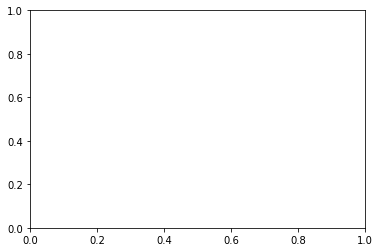

In [37]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()
ax.show()

# 테슬라 주식 데이터로 시간 계산하기

# datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기

# 시간 간격을 인덱스로 설정하여 데이터 추출하기

# 시간 범위 생성하여 인덱스로 지정하기

# 시간 범위의 주기 설정하기

# 에볼라 발병 시간 비교하기